### This is a very much WIP notebook and might not work.

In [1]:
from math import ceil, gcd
import numpy as np
import seaborn as sns

from ipywidgets import Button, IntSlider, Layout, VBox, interact
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plotly import graph_objects as go

from figures import ModuloFigure

In [2]:
%matplotlib inline

----

### Modulo

$\large a^r \mod{C} = 1$

In [5]:
N = 35
a = 4
modfig = ModuloFigure(N, a)

# modfig.intro()
modfig.explore()
# modfig.measure()

interactive(children=(IntSlider(value=0, description='represented number', layout=Layout(width='800px'), max=3…

If we could measure the period directly, we could easily find the two prime factors of $N$, as shown below:

In [32]:
period = 6
m = a ** (period // 2)
print(f"The prime factors of {N} are {gcd(c, m + 1)} and {gcd(c, m - 1)}")

The prime factors of 35 are 5 and 7


In [33]:
measurement = 11
freqs, _ = np.where(modfig._r == measurement)
freqs

----

### Fourier transform

**Fourier transform:**
${\displaystyle {\hat {f}}(\xi )=\int _{-\infty }^{\infty }f(x)\ e^{-2\pi ix\xi }\,dx,\quad \forall \ \xi \in \mathbb {R} .}$

**Inverse fourier transform:**
${\displaystyle f(x)=\int _{-\infty }^{\infty }{\hat {f}}(\xi )\ e^{2\pi ix\xi }\,d\xi ,\quad \forall \ x\in \mathbb {R} .}	
$

In [56]:
t = np.linspace(0, N, 1000)

In [57]:
def plot_sample_cosine(freq, ax, shift_for_visibility=0.05, label=None):

    sine = np.cos(2 * np.pi * t * freq / N)
    ax.plot(t, sine + shift_for_visibility, lw=2, c="red", label=label)

In [58]:
def plot_sample_sine(freq, ax, shift_for_visibility=0.05, label=None):

    sine = np.sin(2 * np.pi * t * freq / N)
    ax.plot(t, sine + shift_for_visibility, lw=2, c="orange", label=label)

In [59]:
def inverse_fourier(fourier, p):

    return (
        fourier * np.exp(2 * np.pi * 1j * p * fourier / N)
    ).sum() / fourier.sum()

In [60]:
def plot_inverse_fourier(fourier, ax, real=True, label=None):

    inv_four = np.array([inverse_fourier(fourier, p) for p in t])
    ax.plot(
        t,
        inv_four.real if real else inv_four.imag,
        lw=2,
        c="navy" if real else "lightblue",
        label=label,
    )

    if label:
        plt.legend()

In [61]:
sample_fourier_pure = np.zeros_like(t)
sample_fourier_pure[[0, -1]] = 1

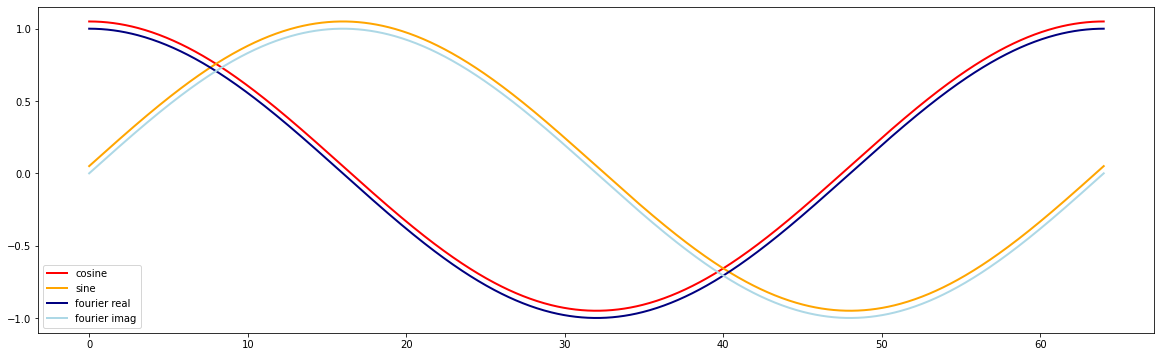

In [70]:
fig, ax = plt.subplots(figsize=(20, 6))

plot_sample_cosine(1, ax, label="cosine")
plot_sample_sine(1, ax, label="sine")

plot_inverse_fourier(sample_fourier_pure, ax, label="fourier real")
plot_inverse_fourier(sample_fourier_pure, ax, real=False, label="fourier imag")

In [68]:
sample_fourier_comp = np.zeros_like(t)
sample_fourier_comp[[0, -1]] = 5
sample_fourier_comp[[9, -10]] = 10

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_inverse_fourier(sample_fourier_comp, ax)
plot_inverse_fourier(sample_fourier_comp, ax, real=False)
plt.show()

----

### QFT

**Quantum fourier transform:**
${\displaystyle QFT(|x\rangle) = \frac{1}{\sqrt{N}}\sum _{y = 0}^{N - 1} e^{\frac{2 \pi i x y}{N}} |y\rangle}, N = 2^n$

In [73]:
y = np.arange(N)

In [75]:
def qft_term(x, y):

    return np.exp(2 * np.pi * 1j * x * y / N) / np.sqrt(N)

In [76]:
def plot_simple_qft(x, ax):
    
    ax.plot(t, qft_term(x, t).real, c="orange")
    ax.plot(t, qft_term(x, t).imag, c="navy")
    
    ax.scatter(y, qft_term(x, y).real, c="black", s=10)
    ax.scatter(y, qft_term(x, y).imag, c="black", s=10)

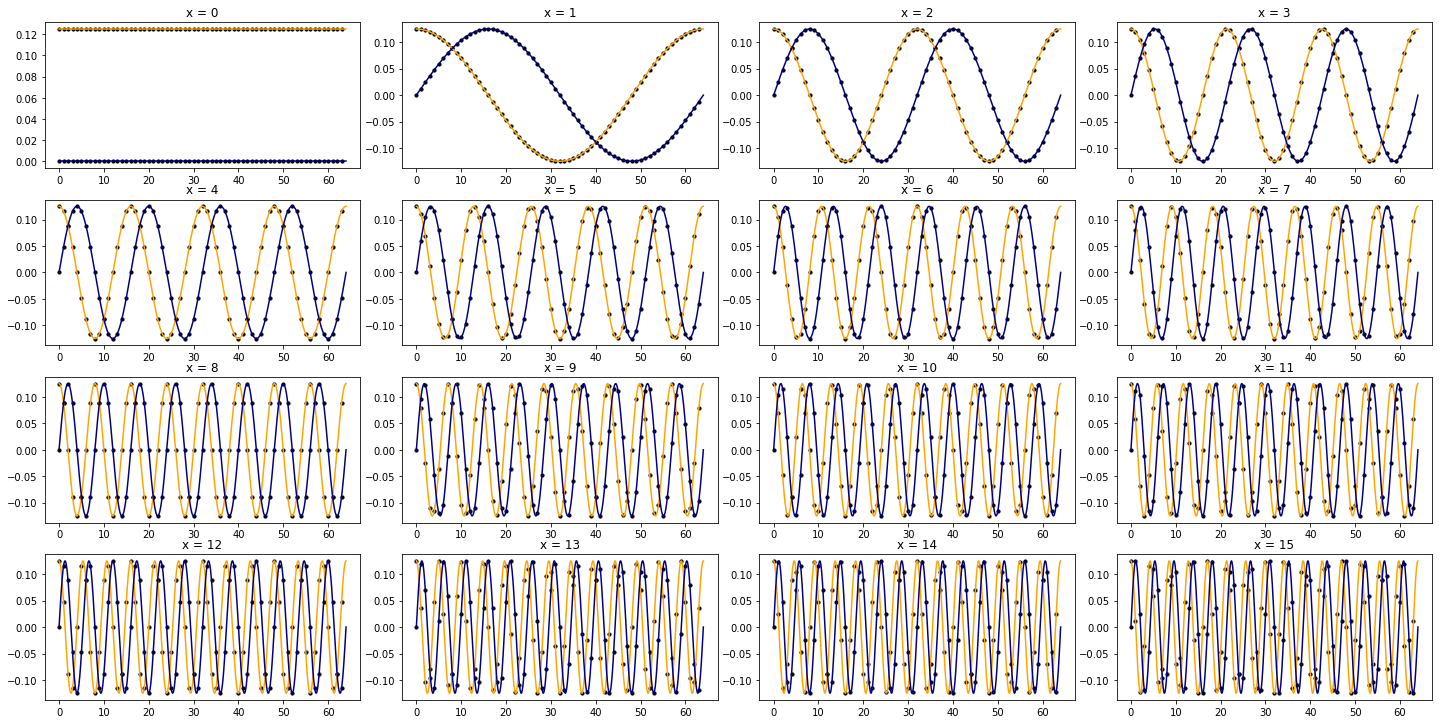

In [77]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10))
fig.tight_layout()

for i, ax in enumerate(axes.flatten()):
    plot_simple_qft(x[i], ax)
    ax.set_title(f"x = {x[i]}")

**Complex conjugate of quantum fourier transform:**
${\displaystyle QFT^{\dagger}(|x\rangle) = \frac{1}{\sqrt{N}}\sum _{y = 0}^{N - 1} e^{-\frac{2 \pi i x y}{N}} |y\rangle}$

In [78]:
def qft_conj_term(x, y):

    return np.exp(-2 * np.pi * 1j * x * y / N) / np.sqrt(N)

In [80]:
def plot_simple_qft_conj(x, ax):

    ax.plot(t, qft_conj_term(x, t).real, c="white" if x in freqs else "orange")
    ax.plot(t, qft_conj_term(x, t).imag, c="navy")

    ax.scatter(y, qft_conj_term(x, y).real, c="black", s=10)
    ax.scatter(y, qft_conj_term(x, y).imag, c="black", s=10)

    if x in freqs:
        ax.set_facecolor("#ee5253")

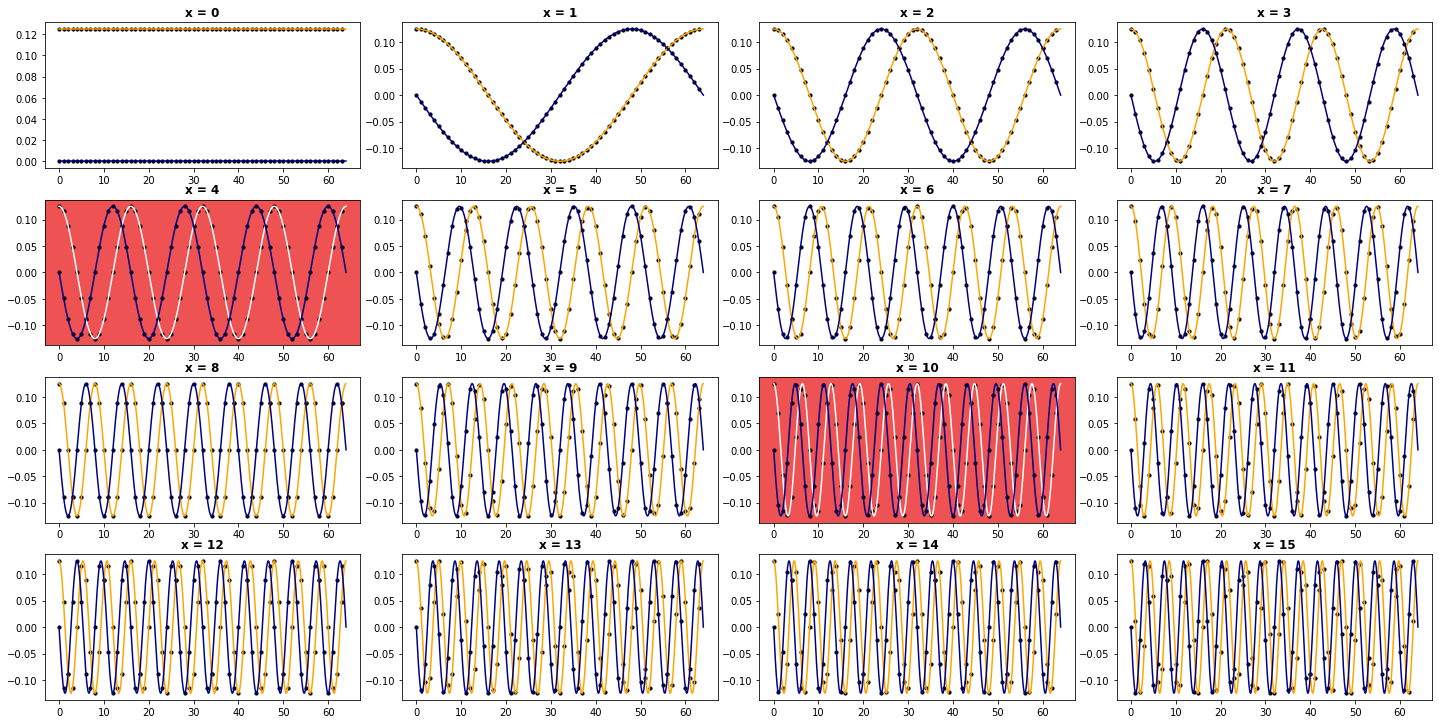

In [81]:
fig, axes = plt.subplots(4, 4, figsize=(20, 10))
fig.tight_layout()

for i, ax in enumerate(axes.flatten()):
    plot_simple_qft_conj(x[i], ax)
    ax.set_title(f"x = {x[i]}", fontweight="bold")

#### continuos interference

In [82]:
qft_for_all = np.array([qft_term(f, t) for f in freqs])
qft_conj_for_all = np.array([qft_conj_term(f, t) for f in freqs])

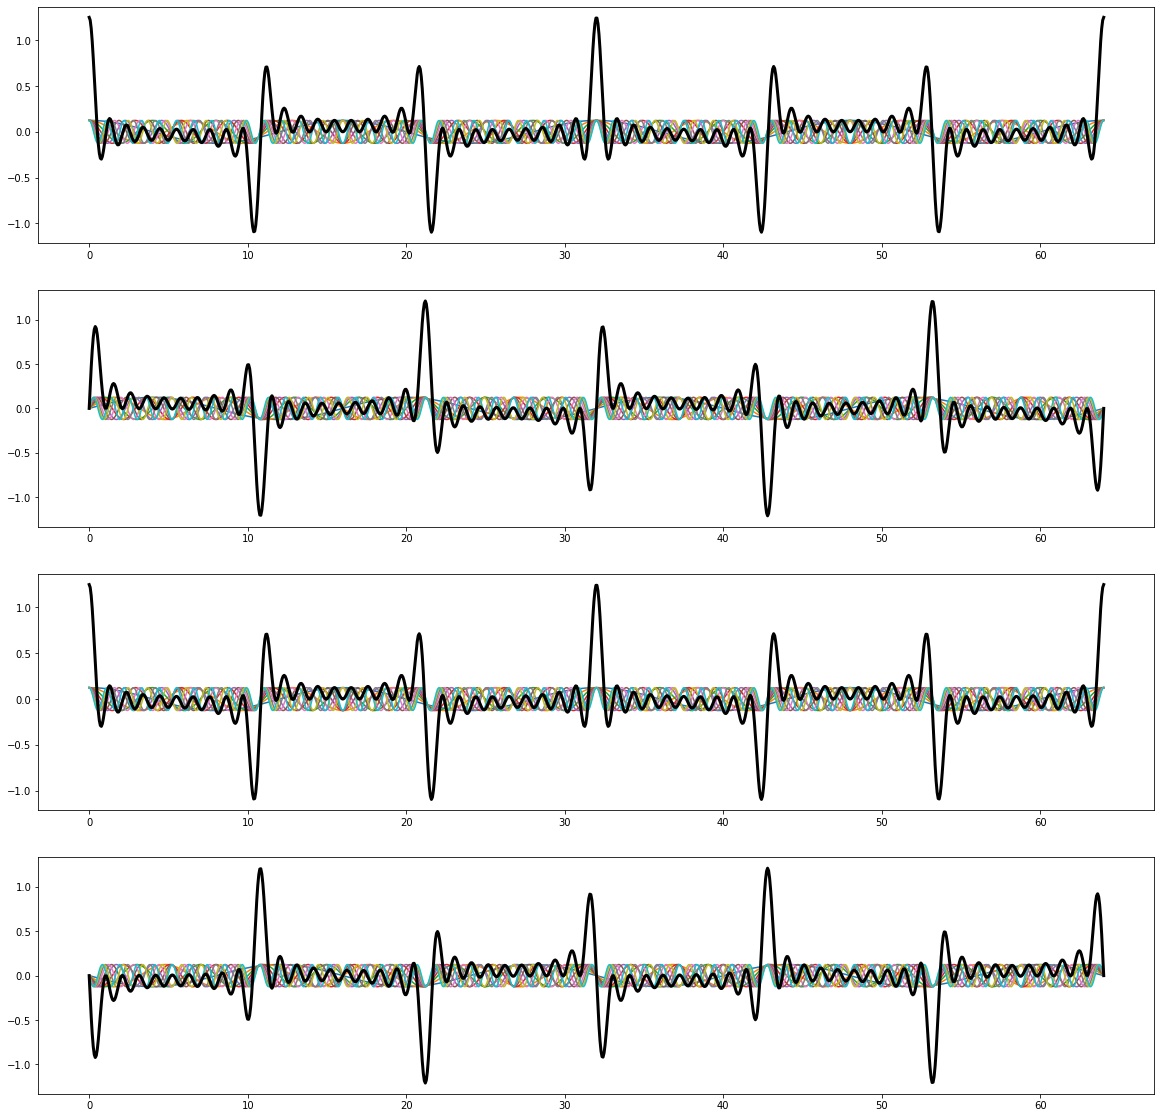

In [83]:
fig, axes = plt.subplots(4, 1, figsize=(20, 20))

for qft, qft_conj in zip(qft_for_all, qft_conj_for_all):

    axes[0].plot(t, qft.real)
    axes[1].plot(t, qft.imag)

    axes[2].plot(t, qft_conj.real)
    axes[3].plot(t, qft_conj.imag)

axes[0].plot(t, qft_for_all.sum(axis=0).real, lw=3, c="black")
axes[1].plot(t, qft_for_all.sum(axis=0).imag, lw=3, c="black")
axes[2].plot(t, qft_conj_for_all.sum(axis=0).real, lw=3, c="black")
axes[3].plot(t, qft_conj_for_all.sum(axis=0).imag, lw=3, c="black")

plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect((5, 1, 1))

for qft_conj in qft_conj_for_all:
    ax.plot(t, qft_conj.real, qft_conj.imag, lw=1)

ax.plot(
    t,
    qft_conj_for_all.sum(axis=0).real,
    qft_conj_for_all.sum(axis=0).imag,
    lw=2,
    c="black",
)

plt.show()

----

### but why?

first (negative) peak: $\large \frac{3\pi}{2} \equiv \frac{3 \cdot 16}{4f} = \frac{12}{f}$

In [ ]:
first_peaks = 12 / freqs

In [87]:
freqs

array([ 4, 10, 16, 22, 28, 34, 40, 46, 52, 58])

In [ ]:
first_peaks

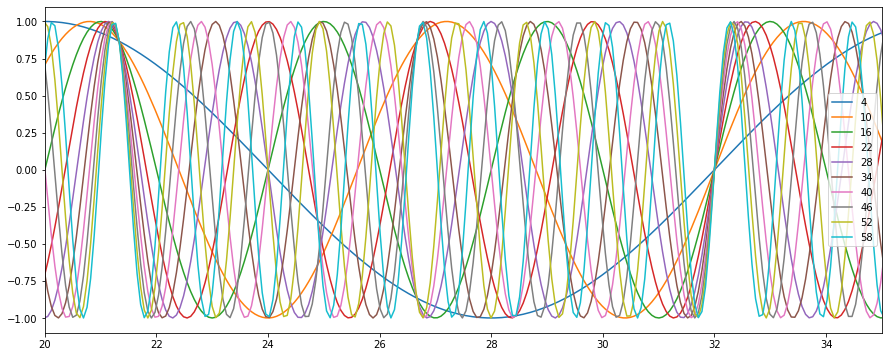

In [96]:
plt.figure(figsize=(15, 6))
#plt.vlines(first_peaks, -1, 1, colors="black", lw=3)

for f in freqs:
    plt.plot(t, np.sin(2 * np.pi * t * f / N), label=str(f))

plt.xlim(20, 35)
plt.legend()
plt.show()

all (negative) peaks: $\large k \cdot \frac{4}{f}, k \in \mathbb{N}, k \leq 4f$

$\large \forall f \leq 16 - 4 = 12:$

$\large k_1 \cdot \frac{4}{f} = k_2 \cdot \frac{4}{f + 4}$

$\large \frac{k_1}{f} = \frac{k_2}{f + 4}$

$\large k_1, k_2 \in \mathbb{N}, k_1 < k_2, k_1 \leq 4f, k_2 \leq 4f + 16$

$\large \frac{k_2}{k_1} = 1 + \frac{4}{f}$

----

#### discrete interference

In [97]:
discrete_qft = np.concatenate([[qft_term(freq, y) for freq in freqs]])
discrete_conj_qft = np.concatenate([[qft_conj_term(freq, y) for freq in freqs]])

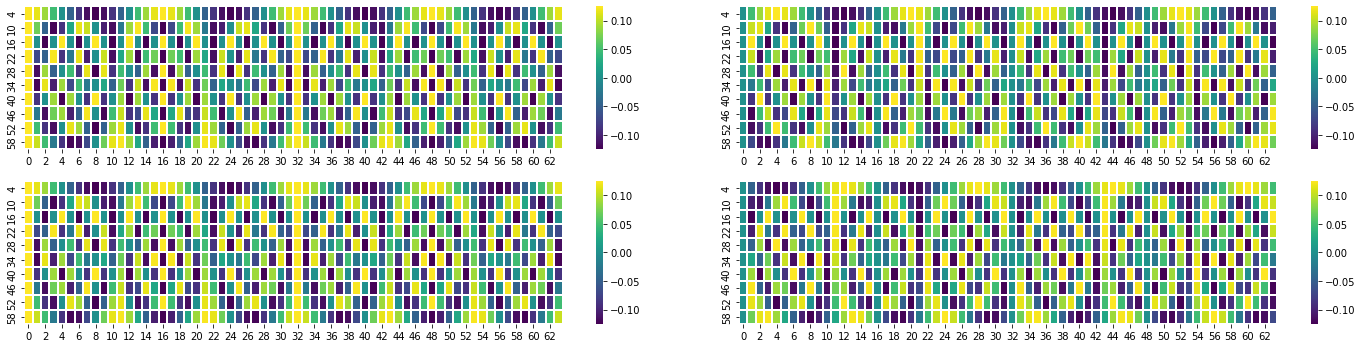

In [98]:
fig, ax_arr = plt.subplots(2, 2, figsize=(20, 5))
fig.tight_layout()
axes = ax_arr.flatten()

props = dict(lw=2, linecolor="white", cmap="viridis")

sns.heatmap(discrete_qft.real, ax=axes[0], **props)
axes[0].set_yticklabels(freqs)

sns.heatmap(discrete_qft.imag, ax=axes[1], **props)
axes[1].set_yticklabels(freqs)

sns.heatmap(discrete_conj_qft.real, ax=axes[2], **props)
axes[2].set_yticklabels(freqs)

sns.heatmap(discrete_conj_qft.imag, ax=axes[3], **props)
axes[3].set_yticklabels(freqs)

plt.show()

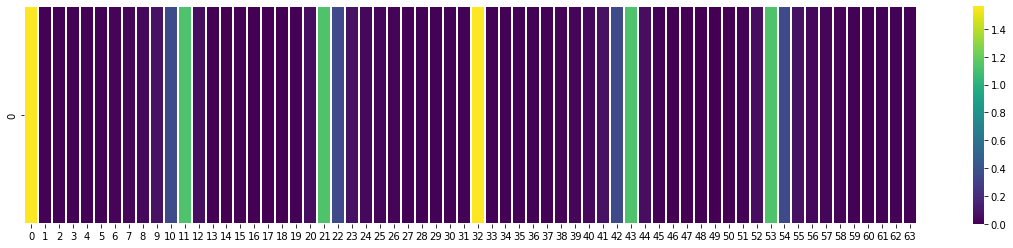

In [103]:
fig = plt.figure(figsize=(20, 4))

sns.heatmap(
    np.concatenate(
        [
            #np.square(np.abs(discrete_qft.real.sum(axis=0))).reshape(1, -1),
            #np.square(np.abs(discrete_qft.imag.sum(axis=0))).reshape(1, -1),
            #np.square(np.abs(discrete_conj_qft.real.sum(axis=0))).reshape(1, -1),
            #np.square(np.abs(discrete_conj_qft.imag.sum(axis=0))).reshape(1, -1),
            np.square(np.abs(discrete_conj_qft.sum(axis=0))).reshape(1, -1)
        ]
    ), lw=2,
    linecolor="white",
    cmap="viridis",
)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(projection="3d")
ax.set_box_aspect((5, 1, 1))

ax.scatter(
    np.arange(N),
    discrete_qft.sum(axis=0).real,
    discrete_qft.sum(axis=0).imag,
    s=100,
    c="orange",
)

ax.plot(
    np.arange(N),
    discrete_qft.sum(axis=0).real,
    discrete_qft.sum(axis=0).imag,
    lw=3,
    c="black",
)

plt.show()